In [1]:

import matplotlib.pyplot as plt
from jax import numpy as jnp

# jax.config.update("jax_enable_x64", True)

In [2]:
def calculate_distances_to_boundary(car_position, car_yaw, boundary_points, num_rays, max_distance=0.15):
    """
    calculate distances to boundary in different directions
    
    Args:
    car_position: car position (x, y)  shape (2,)
    car_yaw: car orientation in radians
    boundary_points: boundary points of the track    shape (N, 2)
    num_rays: number of rays to cast
    
    Returns:
    distances: distance to boundary in different directions    shape (num_rays,)
    hit_points: points of intersections of rays and boundary    shape (num_rays, 2)
    """

    angles = jnp.linspace(-jnp.pi / 2, jnp.pi / 2, num_rays)

    ray_directions = jnp.array([jnp.cos(car_yaw + angles), jnp.sin(car_yaw + angles)])  # (2, num_rays)

    relative_positions = boundary_points - car_position  # (N, 2)
    projections = jnp.dot(relative_positions, ray_directions)  # (N, num_rays)
    distances_to_points = jnp.linalg.norm(relative_positions, axis=1, keepdims=True)  # (N, 1)
    perpendicular_distances = jnp.sqrt(distances_to_points ** 2 - projections ** 2)  # (N, num_rays)

    valid_mask = (projections > 0) & (perpendicular_distances < max_distance)
    valid_projections = jnp.where(valid_mask, projections, jnp.inf)  # (N, num_rays)

    distances = jnp.min(valid_projections, axis=0)  # (num_rays,)
    hit_points = car_position + ray_directions.T * distances[:, None]  # (num_rays, 2)

    return distances_to_points, projections, perpendicular_distances, distances, hit_points

In [3]:
class TrackControlPoints:
    # Control points for the racing track, can be modified to create different tracks

    x = [30.3914, 34.5985, 37.9136, 41.6058, 44.124, 45.9188, 47.1959, 46.7351, 47.377, 47.6532, 46.6591,
         46.5467, 47.6512, 50.0049, 52.5865, 53.9889, 54.3171, 54.2784, 53.4375, 52.333, 52.4365, 52.7472,
         52.8369, 55.1218, 58.2352, 61.1966, 63.6817, 63.8858, 63.6888, 62.9846, 61.3693, 60.3086, 61.1369,
         62.628, 63.8217, 63.6216, 63.6008, 60.7928, 57.7416, 55.1978, 52.4077, 50.7395, 48.7177, 46.7472,
         44.5036, 42.2313, 40.4915, 39.5135, 38.3055, 36.587, 34.6551, 32.3964, 30.7208, 29.1654, 27.7528,
         26.6793, 24.522, 22.221, 19.7474, 19.1721, 19.4022, 20.2766, 21.5824, 20.4607, 19.5942, 18.8348,
         17.8684, 17.3219, 17.6429, 19.1694, 20.7179, 24.2734, 27.8213]
    y = [20.1282, 20.1528, 20.2138, 20.2842, 20.7843, 22.4755, 24.7191, 27.2454, 29.406, 31.7393, 34.3911,
         36.9626, 39.0335, 39.6952, 39.4935, 37.7643, 35.5898, 33.2763, 30.4582, 27.3863, 25.0047, 22.5748,
         20.3727, 19.9309, 19.6341, 19.5305, 20.4003, 23.1452, 25.8114, 27.7581, 29.2077, 32.5508, 35.243,
         37.1483, 39.4283, 41.6718, 44.6677, 46.0382, 46.4869, 45.5216, 45.234, 45.2915, 46.1012, 46.1193,
         45.9755, 45.6591, 44.8517, 43.0108, 41.8028, 40.0157, 38.8012, 39.2758, 40.0983, 41.2595, 43.9097,
         45.7592, 46.6796, 46.7659, 46.1906, 43.9183, 42.0775, 39.5521, 37.8896, 35.5483, 33.2801, 30.8985,
         28.4824, 25.8132, 22.2225, 20.5131, 19.6407, 19.9199, 20.0432]
    r = [4.6, 4.6, 4.6, 4.6, 4.0, 3.0, 3.0, 3.0, 3.0, 1.6, 2.4, 4.6, 5.6, 4.98, 5.4, 5.4, 3.0, 2.4, 2.2,
         2.4, 2.4, 4.4, 4.4, 4.0, 3.0, 3.0, 4.4, 4.0, 3.4, 3.8, 3.4, 2.0, 3.6, 5.0, 4.0, 4.0, 6.0, 4.8, 4.0,
         2.0, 1.6, 2.0, 3.6, 4.4, 5.0, 6.0, 6.0, 5.0, 3.6, 3.4, 4.0, 3.0, 2.6, 3.0, 3.0, 3.0, 3.6, 3.6, 5.0,
         4.8, 2.0, 1.6, 3.8, 2.8, 2.0, 1.8, 2.8, 3.0, 3.0, 4.6, 4.4, 4.4, 4.6]

In [4]:
# x_left, y_left, x_right, y_right, x_center, y_center = generate_racing_track(TrackControlPoints.x, TrackControlPoints.y, TrackControlPoints.r, num_points=1000)
# x_points = x_left.tolist()
# x_points.extend(x_right)
# y_points = y_left.tolist()
# y_points.extend(y_right)
# edge_points = list(zip(x_points, y_points))
# edge_points = jnp.array(edge_points)

In [5]:
from utils.gokart_utils import generate_racing_track

# for new version of generate_racing_track
roadgraph_points, x_center, y_center, cumulative_length = generate_racing_track(
        TrackControlPoints.x,
        TrackControlPoints.y,
        TrackControlPoints.r)
edge_points = roadgraph_points.xy[..., 2000:, :]

2024-09-20 10:03:01.307127: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-20 10:03:01.307152: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-20 10:03:01.307855: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-20 10:03:01.800731: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
print(edge_points.shape)

(4000, 2)


In [7]:
#[30.626804   20.0801     -0.10766554]
# car_pos = jnp.array([TrackControlPoints.x[0], TrackControlPoints.y[0]])+jnp.array([1, 2])
car_pos = jnp.array([30.626804, 20.0801])
car_orientation = -0.10766554  #jnp.pi/4 # radians
num_rays = 8  # Number of rays to cast
max_distance = 0.1  # Maximum perpendicular distance to consider for filtering points

distances: [0.01033039 0.00187974 0.02171912 0.0198799  0.02003364 0.02205987
 0.00699437 0.01946338]
debug_values: [0.]


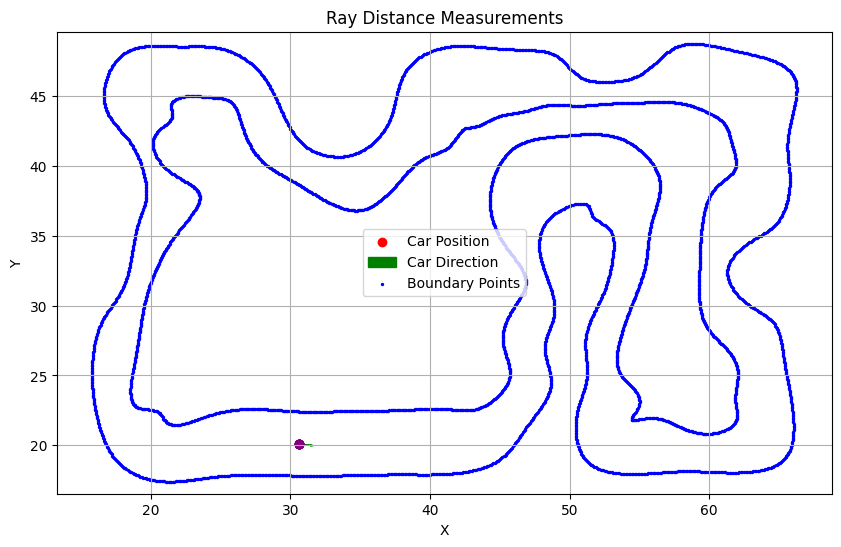

In [9]:
from env.gokart_environment import calculate_distances_to_boundary

#distances_to_points, projections, perpendicular_distances, distances, hit_points = calculate_distances_to_boundary(
        # car_pos, car_orientation, edge_points, num_rays, max_distance)
distances, hit_points, debug_values = calculate_distances_to_boundary(
 car_pos, car_orientation, edge_points, num_rays, max_distance)
# print(projections.mean())
# print(perpendicular_distances.mean())
# distances_to_points = jnp.tile(distances_to_points, (1, num_rays))
# print(jnp.min(distances_to_points - projections))
# print(jnp.sqrt(jnp.min(distances_to_points ** 2 - projections ** 2)))
print(f"distances: {distances}")
print(f"debug_values: {debug_values}")
plt.figure(figsize=(10, 6))

# plot car position and orientation
plt.scatter(*car_pos, color='red', label='Car Position')
car_direction = jnp.array([jnp.cos(car_orientation), jnp.sin(car_orientation)])
plt.arrow(car_pos[0], car_pos[1], car_direction[0], car_direction[1],
          color='green', head_width=0.1, length_includes_head=True, label='Car Direction')

# plot track boundary points
plt.scatter(edge_points[:, 0], edge_points[:, 1], color='blue', label='Boundary Points', s=2)

# plot hit points and rays
for i in range(num_rays):
    plt.plot([car_pos[0], hit_points[i, 0]], [car_pos[1], hit_points[i, 1]],
             'r--', alpha=0.5)
    plt.scatter(hit_points[i, 0], hit_points[i, 1], color='purple')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ray Distance Measurements')
plt.grid(True)
plt.axis('equal')
plt.show()